In [2]:
import Levenshtein
import pandas as pd
import networkx as nx
from difflib import SequenceMatcher
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
patterns = ["AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAA","AAAAB","AAAAB","AAAAB","AAAAB","AAAAB","AAAAB","AAAAB","AAAAB","AAAAB","AAAAB","AAAAB","AAAAB","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABA","AAABB","AAABB","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AAABC","AABAA","AABAA","AABAB","AABAC","AABBA","AABBA","AABBA","AABBA","AABBA","AABBA","AABBB","AABBB","AABBC","AABCA","AABCA","AABCA","AABCA","AABCA","AABCA","AABCA","AABCA","AABCA","AABCA","AABCA","AABCA","AABCA","AABCB","AABCD","AABCD","AABCD","AABCD"]
lgr_patterns = []
ida_patterns = []
bxk_patterns = []
lwg_patterns = []
for i in patterns:
    lgr_patterns.append(i[1])
    ida_patterns.append(i[2])
    bxk_patterns.append(i[3])
    lwg_patterns.append(i[4])
    


In [4]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # return string  
    return (str1.join(s))

lgr_str = listToString(lgr_patterns)
ida_str = listToString(ida_patterns)
bxk_str = listToString(bxk_patterns)
lwg_str = listToString(lwg_patterns)

In [5]:
def similar(a, b):
    print((1- SequenceMatcher(None, a, b).ratio())**2)
    return (1 - SequenceMatcher(None, a, b).ratio())**2  

In [6]:
lgr_ida = similar(lgr_str, ida_str)
lgr_bxk = similar(lgr_str, bxk_str)
lgr_lwg = similar(lgr_str, lwg_str)
ida_bxk = similar(ida_str, bxk_str)
ida_lwg = similar(lwg_str, ida_str)
bxk_lwg = similar(bxk_str, lwg_str)

0.051957179930795835
0.36353806228373714
0.14619377162629757
0.16354887543252597
0.3547253460207612
0.20782871972318342


In [7]:
mat = [[0,lgr_ida,lgr_bxk,lgr_lwg],
       [lgr_ida,0,ida_bxk,ida_lwg],
       [lgr_bxk,ida_bxk,0,bxk_lwg],
       [lgr_lwg,ida_lwg,bxk_lwg,0]]
print(mat)

[[0, 0.051957179930795835, 0.36353806228373714, 0.14619377162629757], [0.051957179930795835, 0, 0.16354887543252597, 0.3547253460207612], [0.36353806228373714, 0.16354887543252597, 0, 0.20782871972318342], [0.14619377162629757, 0.3547253460207612, 0.20782871972318342, 0]]


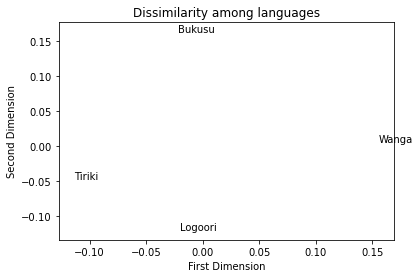

In [8]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(mat)  
mds_coords = mds_model.fit_transform(mat) 
                                                                                                                                  
names = ['Logoori','Tiriki','Bukusu','Wanga']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among languages')    
plt.show()

In [9]:
mds = pd.DataFrame(mds_coords, columns = ['D1', 'D2'], index = names )
mds.head()

,D1,D2
Logoori,-0.019694,-0.120250
Tiriki,-0.113734,-0.047342
Bukusu,-0.022021,0.162594
Wanga,0.155449,0.004997


In [10]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(mds)

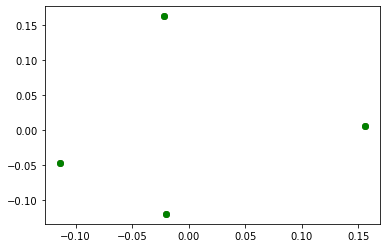

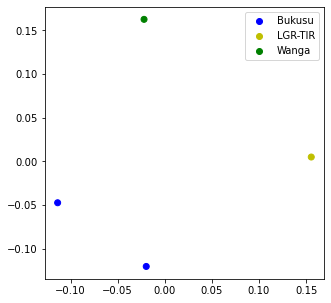

In [11]:
# Building the label to colour mapping
colors = {}
colors[0] = 'b'
colors[1] = 'y'
colors[2] = 'g'

# Building the colour vector for each data point
cvec = [colors[label] for label in labels_rbf]

# Plotting the clustered scatter plot

b = plt.scatter(mds['D1'], mds['D2'], color ='b');
y = plt.scatter(mds['D1'], mds['D2'], color ='y');
g = plt.scatter(mds['D1'], mds['D2'], color ='g');
    
plt.figure(figsize =(5, 5))
plt.scatter(mds['D1'], mds['D2'], c = cvec)
plt.legend((b, y,g), ('Bukusu', 'LGR-TIR','Wanga'))
plt.show()



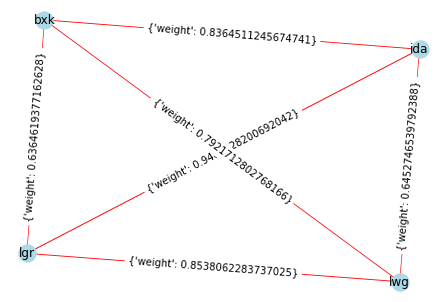

In [57]:
G = nx.Graph()
G.add_nodes_from(['lgr','ida','bxk','lwg'])
G.add_edge('bxk','lwg', weight = (1-bxk_lwg))
G.add_edge('bxk','lgr', weight = (1-lgr_bxk))
G.add_edge('bxk','ida', weight = (1-ida_bxk))
G.add_edge('ida','lgr', weight = (1-lgr_ida))
G.add_edge('ida','lwg', weight = (1-ida_lwg))
G.add_edge('lwg','lgr', weight = (1-lgr_lwg))

weights = nx.get_edge_attributes(G,'weight').values()

pos = nx.spring_layout(G, iterations = 100)

nx.draw(G, pos, with_labels = True, edge_color = 'red',node_color = 'lightblue', width = list(weights))
nx.draw_networkx_edge_labels(G, pos)
plt.show()

In [59]:
laplacian = nx.linalg.laplacianmatrix.laplacian_matrix(G)
print(laplacian)

  (0, 0)	2.4383109861591694
  (0, 1)	-0.9480428200692042
  (0, 2)	-0.6364619377162628
  (0, 3)	-0.8538062283737025
  (1, 0)	-0.9480428200692042
  (1, 1)	2.429768598615917
  (1, 2)	-0.8364511245674741
  (1, 3)	-0.6452746539792388
  (2, 0)	-0.6364619377162628
  (2, 1)	-0.8364511245674741
  (2, 2)	2.265084342560553
  (2, 3)	-0.7921712802768166
  (3, 0)	-0.8538062283737025
  (3, 1)	-0.6452746539792388
  (3, 2)	-0.7921712802768166
  (3, 3)	2.2912521626297577


False